# 5. Advanced Gradient Descent and Optimizers

### About this notebook

This notebook was used in the 50.039 Deep Learning course at the Singapore University of Technology and Design.

**Author:** Matthieu DE MARI (matthieu_demari@sutd.edu.sg)

**Version:** 1.0 (17/12/2022)

**Requirements:**
- Python 3 (tested on v3.9.6)
- Matplotlib (tested on v3.5.1)
- Numpy (tested on v1.22.1)

### Imports

In [10]:
# Matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
# Numpy
import numpy as np
# Removing unecessary warnings (optional, just makes notebook outputs more readable)
import warnings
warnings.filterwarnings("ignore")

### The problem with Vanilla GD

...

In [35]:
def obj_fun(val):
    a4 = 319/8400
    a3 = 43/4200
    a2 = -6799/8400
    a1 = -299/840
    a0 = 6
    return a4*val**4 + a3*val**3 + a2*val**2 + a1*val + a0

In [38]:
def obj_fun_deriv(val):
    a4 = 319/8400
    a3 = 43/4200
    a2 = -6799/8400
    a1 = -299/840
    return 4*a4*val**3 + 3*a3*val**2 + 2*a2*val + a1

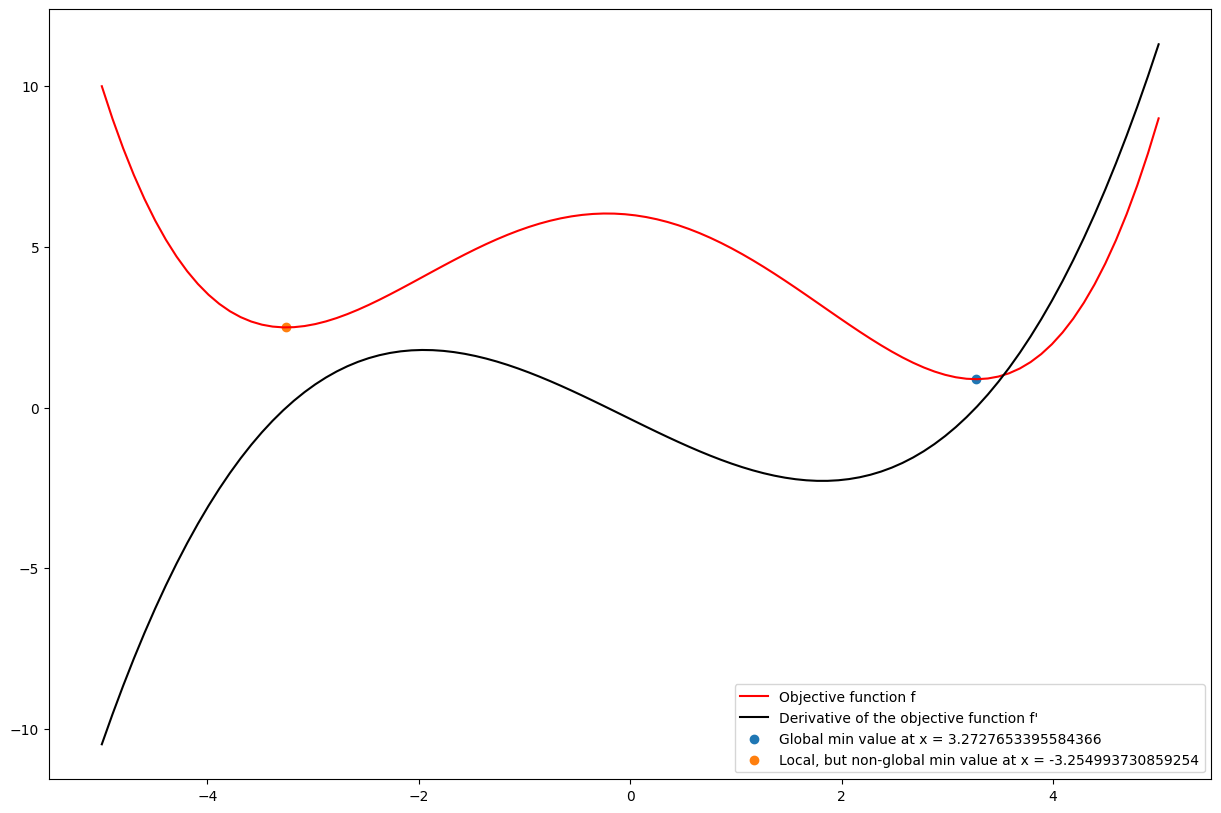

In [89]:
plt.figure(figsize = (15, 10))
x = np.linspace(-5, 5, 100)
y = [obj_fun(i) for i in x]
yp = [obj_fun_deriv(i) for i in x]
plt.plot(x, y, "r", label = "Objective function f")
plt.plot(x, yp, "k", label = "Derivative of the objective function f'")
approx_min_x = 3.2727653395584366
min_y = obj_fun(approx_min_x)
plt.scatter(approx_min_x, min_y, label = "Global min value at x = {}".format(approx_min_x))
approx_min_x2 = -3.254993730859254
min_y2 = obj_fun(approx_min_x2)
plt.scatter(approx_min_x2, min_y2, label = "Local, but non-global min value at x = {}".format(approx_min_x2))
plt.legend(loc = "best")
plt.show()

In [143]:
def vanilla_gd(start_val, alpha = 0.1, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and update value
        val -= alpha*obj_fun_deriv(val)
        list_vals.append(val)
    return val, list_vals

In [144]:
opt_val_vanilla_gd1, val_list_vanilla_gd1 = vanilla_gd(start_val = 5, alpha = 0.1, n_iter = 10)
print("Optimal, found by vanilla gd: ", opt_val_vanilla_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by vanilla gd:  3.2727653395584366
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [145]:
opt_val_vanilla_gd2, val_list_vanilla_gd2 = vanilla_gd(start_val = -5, alpha = 0.1, n_iter = 100)
print("Optimal, found by vanilla gd: ", opt_val_vanilla_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by vanilla gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


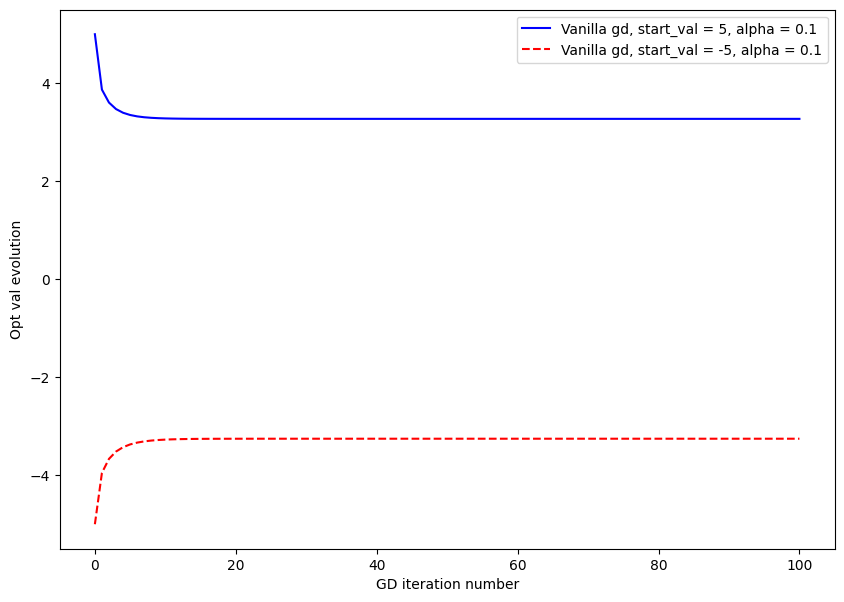

In [154]:
plt.figure(figsize = (10, 7))
plt.plot(range(101), val_list_vanilla_gd1, "b", label = "Vanilla gd, start_val = 5, alpha = 0.1")
plt.plot(range(101), val_list_vanilla_gd2, "r--", label = "Vanilla gd, start_val = -5, alpha = 0.1")
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Adding momentum to try and escape the local min

...

In [156]:
def momentum_gd(start_val, alpha = 0.1, mu = 0.1, n_iter = 100):
    val = start_val
    mom = 0
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and momentum
        grad = -alpha*obj_fun_deriv(val)
        mom = mu*mom + grad
        # Update value
        val += mom
        list_vals.append(val)
    return val, list_vals

In [157]:
opt_val_momentum_gd1, val_list_momentum_gd1 = momentum_gd(start_val = 5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  3.267681061691328
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [158]:
opt_val_momentum_gd2, val_list_momentum_gd2 = momentum_gd(start_val = -5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [159]:
opt_val_momentum_gd3, val_list_momentum_gd3 = momentum_gd(start_val = -5, alpha = 0.1, mu = 0.9, n_iter = 100)
print("Optimal, found by momentum gd: ", opt_val_momentum_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by momentum gd:  3.267681061691328
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


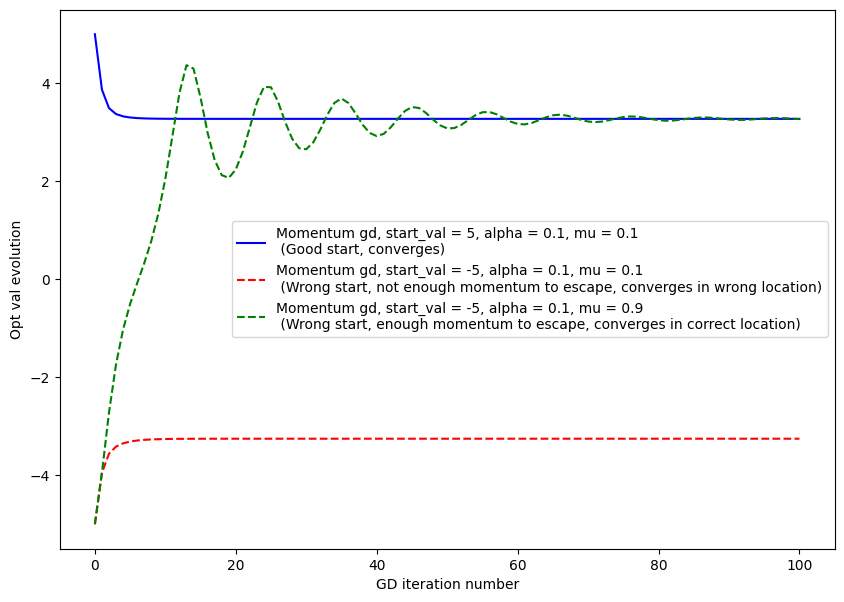

In [301]:
plt.figure(figsize = (10, 7))
label1 = "Momentum gd, start_val = 5, alpha = 0.1, mu = 0.1"
label1 += " \n (Good start, converges)"
plt.plot(range(101), val_list_momentum_gd1, "b", label = label1)
label2 = "Momentum gd, start_val = -5, alpha = 0.1, mu = 0.1"
label2 += " \n (Wrong start, not enough momentum to escape, converges in wrong location)"
plt.plot(range(101), val_list_momentum_gd2, "r--", label = label2)
label3 = "Momentum gd, start_val = -5, alpha = 0.1, mu = 0.9"
label3 += " \n (Wrong start, enough momentum to escape, converges in correct location)"
plt.plot(range(101), val_list_momentum_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### A variation on momentum, the Nesterov Accelerated Gradient (NAG)

Nesterov accelerated gradient descent (NAG) is a variant of stochastic gradient descent that can help accelerate convergence and improve the optimization of deep learning models. It does this by incorporating the concept of momentum, although in a slightly different way than before, which helps the optimization algorithm to continue moving in the same direction even if the gradients change.

In [162]:
def nesterov_gd(start_val, alpha = 0.1, mu = 0.1, n_iter = 100):
    val = start_val
    mom = 0
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradient and Nesterov momentum
        grad = -alpha*obj_fun_deriv(val)
        mom = mu*mom + grad
        # Update value
        val += mu*mom + grad
        list_vals.append(val)
    return val, list_vals

In [163]:
opt_val_nesterov_gd1, val_list_nesterov_gd1 = nesterov_gd(start_val = 5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  3.2727653395584366
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [165]:
opt_val_nesterov_gd2, val_list_nesterov_gd2 = nesterov_gd(start_val = -5, alpha = 0.1, mu = 0.1, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  -3.254993730859254
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [166]:
opt_val_nesterov_gd3, val_list_nesterov_gd3 = nesterov_gd(start_val = -5, alpha = 0.2, mu = 0.9, n_iter = 100)
print("Optimal, found by Nesterov gd: ", opt_val_nesterov_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Nesterov gd:  3.2727653395584357
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


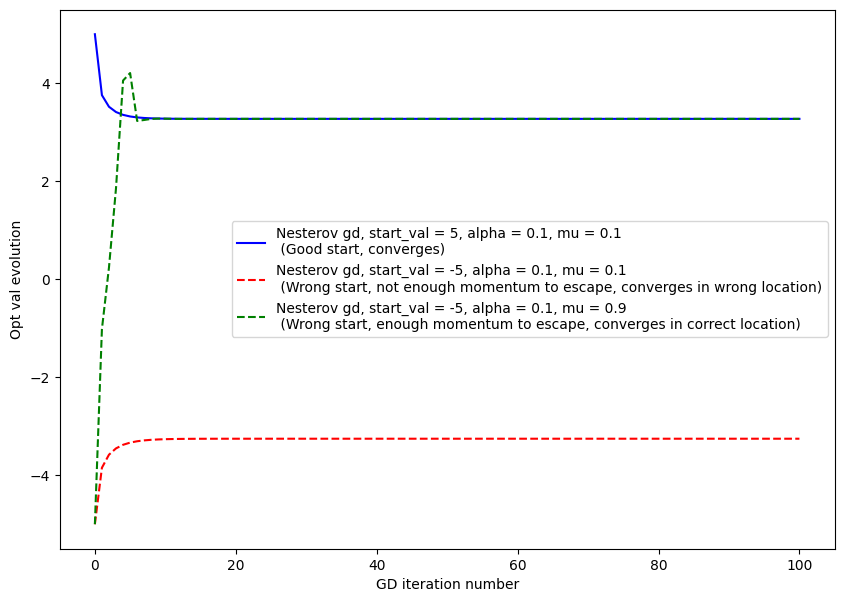

In [302]:
plt.figure(figsize = (10, 7))
label1 = "Nesterov gd, start_val = 5, alpha = 0.1, mu = 0.1"
label1 += " \n (Good start, converges)"
plt.plot(range(101), val_list_nesterov_gd1, "b", label = label1)
label2 = "Nesterov gd, start_val = -5, alpha = 0.1, mu = 0.1"
label2 += " \n (Wrong start, not enough momentum to escape, converges in wrong location)"
plt.plot(range(101), val_list_nesterov_gd2, "r--", label = label2)
label3 = "Nesterov gd, start_val = -5, alpha = 0.1, mu = 0.9"
label3 += " \n (Wrong start, enough momentum to escape, converges in correct location)"
plt.plot(range(101), val_list_nesterov_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Using a simple learning rate decay in Vanilla GD

...

In [171]:
def vanilla_gd_lrdecay(start_val, alpha = 0.1, alpha_decay_fac = 0.99, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Decay on LR
        alpha *= alpha_decay_fac
        # Update value
        val += -alpha*obj_fun_deriv(val)
        list_vals.append(val)
    return val, list_vals

In [204]:
opt_val_lrdecay_gd1, val_list_lrdecay_gd1 = vanilla_gd_lrdecay(start_val = 5, \
                                                              alpha = 0.2, \
                                                              alpha_decay_fac = 1, \
                                                              n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [208]:
opt_val_lrdecay_gd2, val_list_lrdecay_gd2 = vanilla_gd_lrdecay(start_val = 5, \
                                                               alpha = 0.2, \
                                                               alpha_decay_fac = 0.75, \
                                                               n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.2779747340306966
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [209]:
opt_val_lrdecay_gd3, val_list_lrdecay_gd3 = vanilla_gd_lrdecay(start_val = 5, \
                                                               alpha = 0.2, \
                                                               alpha_decay_fac = 0.5, \
                                                               n_iter = 100)
print("Optimal, found by Vanilla LR decay gd: ", opt_val_lrdecay_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR decay gd:  3.6473725891985467
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


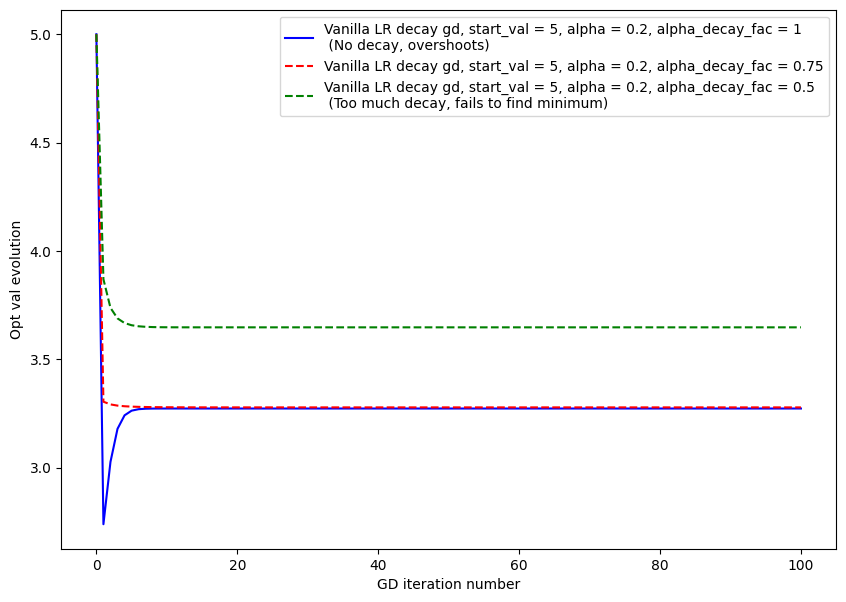

In [300]:
plt.figure(figsize = (10, 7))
label1 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 1"
label1 += " \n (No decay, overshoots)"
plt.plot(range(101), val_list_lrdecay_gd1, "b", label = label1)
label2 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.75"
label1 += " \n (Optimal decay?)"
plt.plot(range(101), val_list_lrdecay_gd2, "r--", label = label2)
label3 = "Vanilla LR decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.5"
label3 += " \n (Too much decay, fails to find minimum)"
plt.plot(range(101), val_list_lrdecay_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

Many other functions can be used to produce a decay on the learning rate. Below are a few notable examples.

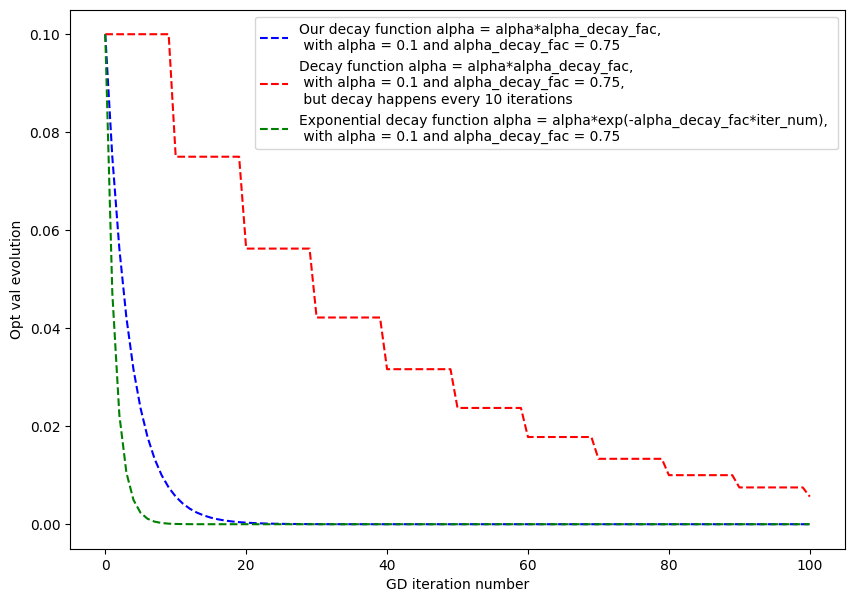

In [222]:
plt.figure(figsize = (10, 7))
label1 = "Our decay function alpha = alpha*alpha_decay_fac,"
label1 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75"
plt.plot(range(101), [0.1*(0.75)**i for i in range(101)], "b--", label = label1)
label2 = "Decay function alpha = alpha*alpha_decay_fac,"
label2 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75,"
label2 += " \n but decay happens every 10 iterations"
plt.plot(range(101), [0.1*(0.75)**(i//10) for i in range(101)], "r--", label = label2)
label3 = "Exponential decay function alpha = alpha*exp(-alpha_decay_fac*iter_num),"
label3 += " \n with alpha = 0.1 and alpha_decay_fac = 0.75"
plt.plot(range(101), [0.1*np.exp(-0.75*i) for i in range(101)], "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Using a gradient-based learning rate decay in Vanilla GD

...

In [295]:
def vanilla_gd_gradlrdecay(start_val, alpha = 0.1, alpha_decay_fac = 0.99, n_iter = 100):
    val = start_val
    list_vals = [val]
    for iter_num in range(n_iter):
        # Compute gradients
        grad = obj_fun_deriv(val)
        # Gradient-based decay on LR
        alpha *= 1/(1 + alpha_decay_fac*np.sqrt(np.abs(grad)))
        # Update value
        val += -alpha*grad
        list_vals.append(val)
    return val, list_vals

In [296]:
opt_val_gradlrdecay_gd1, val_list_gradlrdecay_gd1 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0.1, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd1)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [297]:
opt_val_gradlrdecay_gd2, val_list_gradlrdecay_gd2 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd2)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


In [298]:
opt_val_gradlrdecay_gd3, val_list_gradlrdecay_gd3 = vanilla_gd_gradlrdecay(start_val = 5, \
                                                                           alpha = 0.2, \
                                                                           alpha_decay_fac = 0.05, \
                                                                           n_iter = 100)
print("Optimal, found by Vanilla LR grad-decay gd: ", opt_val_gradlrdecay_gd3)
print("Global min: ", approx_min_x)
print("Local, non-global min: ", approx_min_x2)

Optimal, found by Vanilla LR grad-decay gd:  3.272765339558436
Global min:  3.2727653395584366
Local, non-global min:  -3.254993730859254


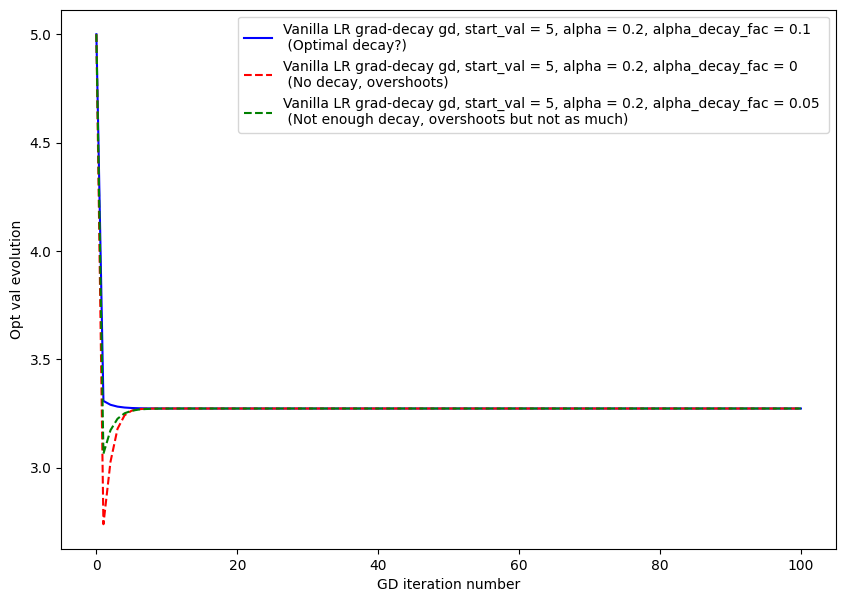

In [303]:
plt.figure(figsize = (10, 7))
label1 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.1"
label1 += " \n (Optimal decay?)"
plt.plot(range(101), val_list_gradlrdecay_gd1, "b", label = label1)
label2 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0"
label2 += " \n (No decay, overshoots)"
plt.plot(range(101), val_list_gradlrdecay_gd2, "r--", label = label2)
label3 = "Vanilla LR grad-decay gd, start_val = 5, alpha = 0.2, alpha_decay_fac = 0.05"
label3 += " \n (Not enough decay, overshoots but not as much)"
plt.plot(range(101), val_list_gradlrdecay_gd3, "g--", label = label3)
plt.xlabel("GD iteration number")
plt.ylabel("Opt val evolution")
plt.legend(loc = "best")
plt.show()

### Mock dataset, with nonlinearity

As in the previous notebook.

In [11]:
# All helper functions
eps = 1e-5
min_val = -1 + eps
max_val = 1 - eps
def val(min_val, max_val):
    return round(np.random.uniform(min_val, max_val), 2)
def class_for_val(val1, val2):
    k = np.pi
    return int(val2 >= -1/4 + 3/4*np.sin(val1*k))
n_points = 1000
def create_dataset(n_points, min_val, max_val):
    val1_list = np.array([val(min_val, max_val) for _ in range(n_points)])
    val2_list = np.array([val(min_val, max_val) for _ in range(n_points)])
    inputs = np.array([[v1, v2] for v1, v2 in zip(val1_list, val2_list)])
    outputs = np.array([class_for_val(v1, v2) for v1, v2 in zip(val1_list, val2_list)]).reshape(n_points, 1)
    return val1_list, val2_list, inputs, outputs

In [12]:
# Generate dataset
np.random.seed(47)
val1_list, val2_list, inputs, outputs = create_dataset(n_points, min_val, max_val)
# Check a few entries of the dataset
print(val1_list.shape)
print(val2_list.shape)
print(inputs.shape)
print(outputs.shape)
print(inputs[0:10, :])
print(outputs[0:10])

(1000,)
(1000,)
(1000, 2)
(1000, 1)
[[-0.77 -0.6 ]
 [ 0.95  0.28]
 [ 0.46 -0.91]
 [-0.3   0.23]
 [ 0.42 -0.61]
 [ 0.6   0.97]
 [ 0.29  0.37]
 [-0.17  0.4 ]
 [ 0.41  0.29]
 [-0.51  0.02]]
[[1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]]


As expected and observed in the plots below, the dataset now longer exhibits linearity. In fact the function is no longer polynomial either due to the presence of a logarithmic function.

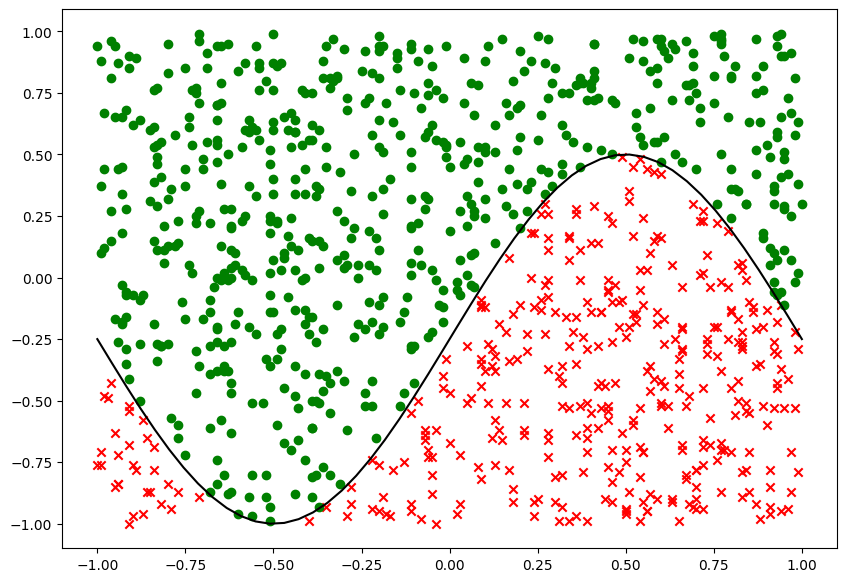

In [13]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "r", 1: "g"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])
    
# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary")

# Show
plt.show()

### Shallow Neural Net with Sigmoid Activations, Vanilla Gradient Descent in Backprop

As in the previous notebook.

In [352]:
class ShallowNeuralNet_VanillaGD():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Gradient descent update rules
        self.W2 += alpha*grad_W2
        self.W1 += alpha*grad_W1
        self.b2 += alpha*grad_b2
        self.b1 += alpha*grad_b1
        
        # Update loss
        self.CE_loss(inputs, outputs)
    
    def train(self, N_max = 1000, alpha = 1e-5, beta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            self.backward(inputs, outputs, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//1000) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for beta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < beta):
                if(display):
                    print("Stopping early - loss evolution was less than beta.")
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [353]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_vanilla = ShallowNeuralNet_VanillaGD(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_vanilla.train(N_max = 100000, alpha = 1, beta = 1e-10, display = True)
print(shallow_neural_net_vanilla.loss)

Iteration 1 - Loss = 0.67548314787971
Iteration 101 - Loss = 0.6301633373015502
Iteration 201 - Loss = 0.5120837397069476
Iteration 301 - Loss = 0.38361361397191773
Iteration 401 - Loss = 0.32967447396291555
Iteration 501 - Loss = 0.30685987533285164
Iteration 601 - Loss = 0.2954704464056538
Iteration 701 - Loss = 0.2890442940587869
Iteration 801 - Loss = 0.2850934961925726
Iteration 901 - Loss = 0.2825063674856932
Iteration 1001 - Loss = 0.28072737362278427
Iteration 1101 - Loss = 0.27945439814366396
Iteration 1201 - Loss = 0.278511909093315
Iteration 1301 - Loss = 0.277792293767587
Iteration 1401 - Loss = 0.27722651254381686
Iteration 1501 - Loss = 0.2767684596455835
Iteration 1601 - Loss = 0.2763861813161717
Iteration 1701 - Loss = 0.2760567220116171
Iteration 1801 - Loss = 0.2757629820563233
Iteration 1901 - Loss = 0.27549173550718636
Iteration 2001 - Loss = 0.27523233981483863
Iteration 2101 - Loss = 0.2749758689039339
Iteration 2201 - Loss = 0.2747145093595285
Iteration 2301 - Lo

KeyboardInterrupt: 

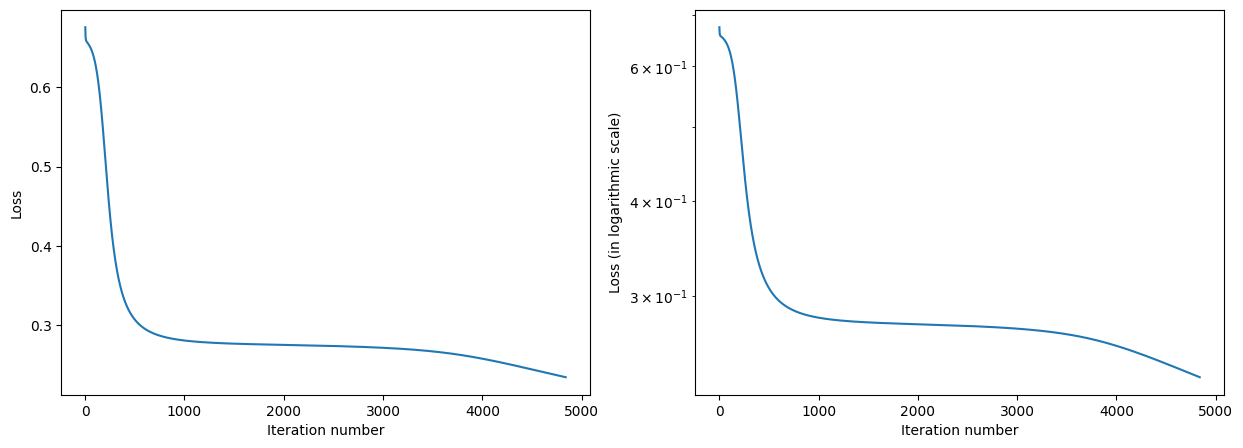

In [354]:
shallow_neural_net_vanilla.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, AdaGrad in Backprop

AdaGrad: This variation of gradient descent adapts the learning rate for each parameter separately, based on the historical gradient information for that parameter. AdaGrad scales down the learning rate for parameters that have received a large number of updates, which can help prevent overfitting and improve the generalization ability of the model.

RMSProp: This variation of gradient descent is similar to AdaGrad, but it uses a running average of the squared gradients to scale the learning rate for each parameter, rather than using the sum of the squared gradients as in AdaGrad. RMSProp can be less sensitive to the learning rate than AdaGrad, and it is often used in conjunction with other techniques such as momentum.

Adam: This is a popular variation of gradient descent that combines the ideas of momentum and RMSProp. Adam uses an exponentially decaying average of the past gradients to scale the learning rate for each parameter, and it also uses an exponentially decaying average of the past squared gradients to scale the learning rate. Adam is widely used in deep learning applications because it can often achieve good performance with relatively little hyperparameter tuning.

In [407]:
class ShallowNeuralNet_AdaGrad():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, G_list, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Momentum and gradient decay/normalization for each parameter
        G_W2, G_W1, G_b2, G_b1 = G_list
        G_W2 += grad_W2**2
        G_W1 += grad_W1**2
        G_b2 += grad_b2**2
        G_b1 += grad_b1**2
        G_list = [G_W2, G_W1, G_b2, G_b1]
        
        # Gradient descent update rules
        eps = 1e-6
        self.W2 += alpha*grad_W2/(np.sqrt(G_W2 + eps))
        self.W1 += alpha*grad_W1/(np.sqrt(G_W1 + eps))
        self.b2 += alpha*grad_b2/(np.sqrt(G_b2 + eps))
        self.b1 += alpha*grad_b1/(np.sqrt(G_b1 + eps))
        
        # Update loss
        self.CE_loss(inputs, outputs)
        return G_list
    
    def train(self, N_max = 1000, alpha = 1e-5, beta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Initialize G_list
        G_list = [0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            G_list = self.backward(inputs, outputs, G_list, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//1000) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for beta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < beta):
                if(display):
                    print("Stopping early - loss evolution was less than beta.")
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [408]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_adagrad = ShallowNeuralNet_AdaGrad(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_adagrad.train(N_max = 100000, alpha = 1, beta = 1e-10, display = True)
print(shallow_neural_net_adagrad.loss)

Iteration 1 - Loss = 2.227378977390921
Iteration 101 - Loss = 0.13955718622629296
Iteration 201 - Loss = 0.0812394129244918
Iteration 301 - Loss = 0.06032405607986714
Iteration 401 - Loss = 0.05002396384055196
Iteration 501 - Loss = 0.04378998734992303
Iteration 601 - Loss = 0.03953084560560592
Iteration 701 - Loss = 0.036399324684546173
Iteration 801 - Loss = 0.0339890225627402
Iteration 901 - Loss = 0.03206233519119409
Iteration 1001 - Loss = 0.030435740199821367
Iteration 1101 - Loss = 0.029001533314934703
Iteration 1201 - Loss = 0.027716366453463665
Iteration 1301 - Loss = 0.02656710307661268
Iteration 1401 - Loss = 0.025544759729047423
Iteration 1501 - Loss = 0.02463453604972172
Iteration 1601 - Loss = 0.023819737191361885
Iteration 1701 - Loss = 0.023085131254198962
Iteration 1801 - Loss = 0.022417958814402908
Iteration 1901 - Loss = 0.021807839272823537
Iteration 2001 - Loss = 0.02124634890637233
Iteration 2101 - Loss = 0.020726582707625518
Iteration 2201 - Loss = 0.020242774256

Iteration 18201 - Loss = 0.0054359094690119075
Iteration 18301 - Loss = 0.005417417009970621
Iteration 18401 - Loss = 0.005399074881190167
Iteration 18501 - Loss = 0.005380882103646506
Iteration 18601 - Loss = 0.00536283764126002
Iteration 18701 - Loss = 0.005344940403713562
Iteration 18801 - Loss = 0.005327189249359278
Iteration 18901 - Loss = 0.0053095829881897
Iteration 19001 - Loss = 0.005292120384851883
Iteration 19101 - Loss = 0.00527480016168403
Iteration 19201 - Loss = 0.005257621001753551
Iteration 19301 - Loss = 0.005240581551875285
Iteration 19401 - Loss = 0.00522368042558867
Iteration 19501 - Loss = 0.005206916206072756
Iteration 19601 - Loss = 0.0051902874489794465
Iteration 19701 - Loss = 0.005173792685167611
Iteration 19801 - Loss = 0.005157430423323077
Iteration 19901 - Loss = 0.005141199152452618
Iteration 20001 - Loss = 0.005125097344244023
Iteration 20101 - Loss = 0.005109123455286943
Iteration 20201 - Loss = 0.00509327592915353
Iteration 20301 - Loss = 0.00507755319

KeyboardInterrupt: 

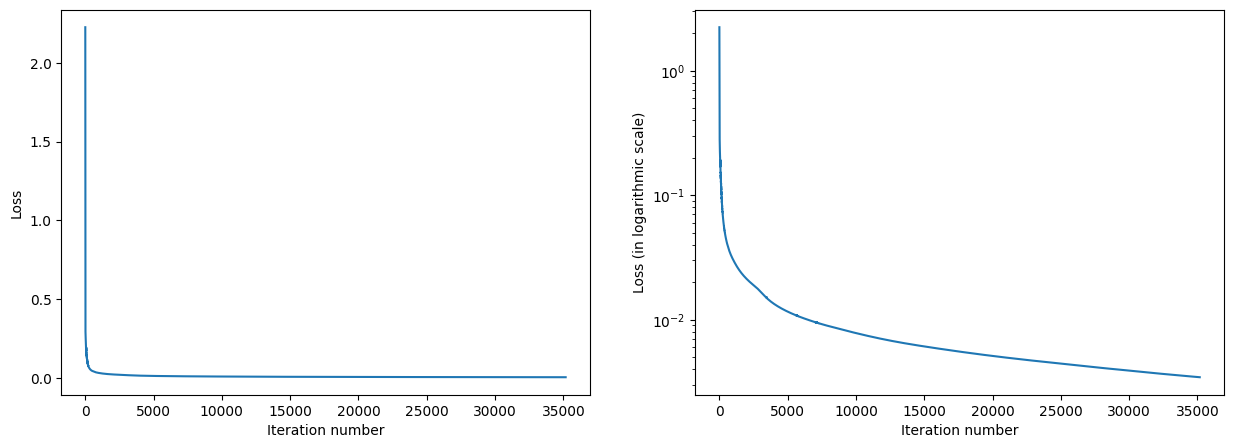

In [409]:
shallow_neural_net_adagrad.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, RMSProp in Backprop

...

In [410]:
class ShallowNeuralNet_RMSProp():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, G_list, alpha = 1e-5, rho = 0.1):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradients
        grad_W2 = -(1/m)*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Momentum and gradient decay/normalization for each parameter
        G_W2, G_W1, G_b2, G_b1 = G_list
        G_W2 = rho*G_W2 + (1 - rho)*grad_W2**2
        G_W1 = rho*G_W1 + (1 - rho)*grad_W1**2
        G_b2 = rho*G_b2 + (1 - rho)*grad_b2**2
        G_b1 = rho*G_b1 + (1 - rho)*grad_b1**2
        G_list = [G_W2, G_W1, G_b2, G_b1]
        
        # Gradient descent update rules
        eps = 1e-6
        self.W2 += alpha*grad_W2/(np.sqrt(G_W2 + eps))
        self.W1 += alpha*grad_W1/(np.sqrt(G_W1 + eps))
        self.b2 += alpha*grad_b2/(np.sqrt(G_b2 + eps))
        self.b1 += alpha*grad_b1/(np.sqrt(G_b1 + eps))
        
        # Update loss
        self.CE_loss(inputs, outputs)
        return G_list
    
    def train(self, N_max = 1000, alpha = 1e-5, rho = 0.1, beta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Initialize G_list
        G_list = [0*self.W2, 0*self.W1, 0*self.b2, 0*self.b1]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            G_list = self.backward(inputs, outputs, G_list, alpha, rho)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//1000) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for beta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < beta):
                if(display):
                    print("Stopping early - loss evolution was less than beta.")
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [411]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_rmsprop = ShallowNeuralNet_RMSProp(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_rmsprop.train(N_max = 100000, alpha = 1, rho = 0.1, beta = 1e-10, display = True)
print(shallow_neural_net_rmsprop.loss)

Iteration 1 - Loss = 2.34493800630799
Iteration 101 - Loss = 0.23342467349706428
Iteration 201 - Loss = 0.17315471583614409
Iteration 301 - Loss = 0.13989276297632636
Iteration 401 - Loss = 0.11543710545480383
Iteration 501 - Loss = 0.10141946191582756
Iteration 601 - Loss = 0.0846131326700411
Iteration 701 - Loss = 0.09764552262238757
Iteration 801 - Loss = 0.07124220191238771
Iteration 901 - Loss = 0.08087059064187493
Iteration 1001 - Loss = 0.07021431214238547
Iteration 1101 - Loss = 0.07612534238902266
Iteration 1201 - Loss = 0.07038719706244446
Iteration 1301 - Loss = 0.0512464595885904
Iteration 1401 - Loss = 0.06477571700560386
Iteration 1501 - Loss = 0.04745421414589225
Iteration 1601 - Loss = 0.05049747500063491
Iteration 1701 - Loss = 0.0459308976440944
Iteration 1801 - Loss = 0.04474851001761742
Iteration 1901 - Loss = 0.042066186509389196
Iteration 2001 - Loss = 0.04418588266747857
Iteration 2101 - Loss = 0.0438063208602111
Iteration 2201 - Loss = 0.04782541300797564
Iterat

KeyboardInterrupt: 

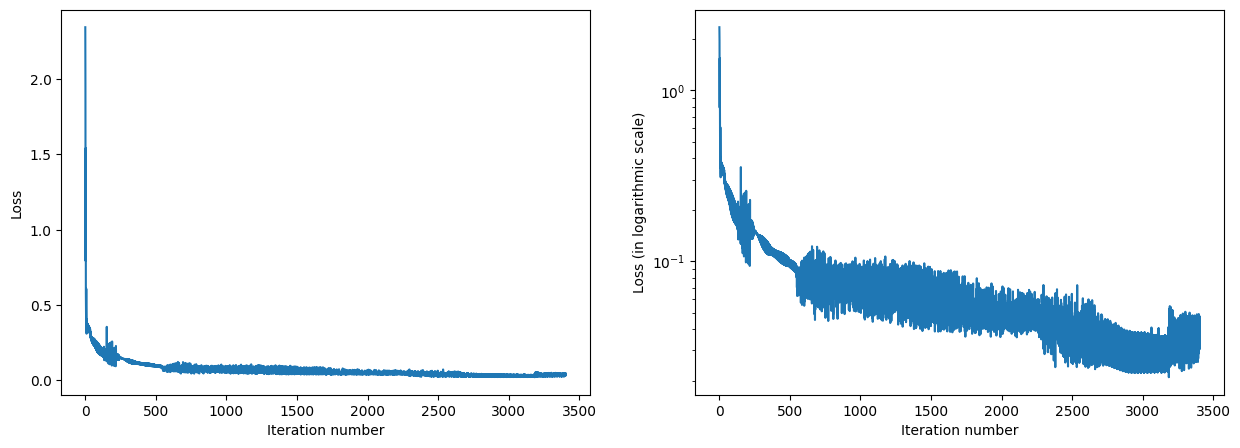

In [412]:
shallow_neural_net_rmsprop.show_losses_over_training()

### Shallow Neural Net with Sigmoid Activations, Adam in Backprop

...

In [14]:
class ShallowNeuralNet_Adam():
    
    def __init__(self, n_x, n_h, n_y):
        # Network dimensions
        self.n_x = n_x
        self.n_h = n_h
        self.n_y = n_y
        # Initialize parameters
        self.init_parameters_normal()
        # Loss, initialized as infinity before first calculation is made
        self.loss = float("Inf")
         
    def init_parameters_normal(self):
        # Weights and biases matrices (randomly initialized)
        self.W1 = np.random.randn(self.n_x, self.n_h)*0.1
        self.b1 = np.random.randn(1, self.n_h)*0.1
        self.W2 = np.random.randn(self.n_h, self.n_y)*0.1
        self.b2 = np.random.randn(1, self.n_y)*0.1

    def sigmoid(self, val):
        return 1/(1 + np.exp(-val))
    
    def forward(self, inputs):
        # Wx + b operation for the first layer
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        # Wx + b operation for the second layer
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
        return y_pred
    
    def CE_loss(self, inputs, outputs):
        # MSE loss function as before
        outputs_re = outputs.reshape(-1, 1)
        pred = self.forward(inputs)
        eps = 1e-10
        losses = outputs*np.log(pred + eps) + (1 - outputs)*np.log(1 - pred + eps)
        self.loss = -np.sum(losses)/outputs.shape[0]
        return self.loss
    
    def backward(self, inputs, outputs, alpha = 1e-5):
        # Get the number of samples in dataset
        m = inputs.shape[0]
        
        # Forward propagate
        Z1 = np.matmul(inputs, self.W1)
        Z1_b = Z1 + self.b1
        A1 = self.sigmoid(Z1_b)
        Z2 = np.matmul(A1, self.W2)
        Z2_b = Z2 + self.b2
        y_pred = self.sigmoid(Z2_b)
    
        # Compute error term
        epsilon = y_pred - outputs
        gradient_output = epsilon*y_pred*(1 - y_pred)
        error_hidden = np.dot(gradient_output, self.W2.T)
        gradient_hidden = error_hidden*A1*(1 - A1)
        
        # Compute gradient
        grad_W2 = -(1/m)*alpha*np.dot(A1.T, gradient_output)
        grad_W1 = -(1/m)*alpha*np.dot(inputs.T, gradient_hidden)
        grad_b2 = -(1/m)*alpha*np.sum(gradient_output, axis = 0, keepdims = True)
        grad_b1 = -(1/m)*alpha*np.sum(gradient_hidden, axis = 0, keepdims = True)
        
        # Gradient descent update rules
        self.W2 += grad_W2
        self.W1 += grad_W1
        self.b2 += grad_b2
        self.b1 -= grad_b1
        
        # Update loss
        self.CE_loss(inputs, outputs)
    
    def train(self, N_max = 1000, alpha = 1e-5, beta = 1e-5, display = True):
        # List of losses, starts with the current loss
        self.losses_list = [self.loss]
        # Repeat iterations
        for iteration_number in range(1, N_max + 1):
            # Backpropagate
            self.backward(inputs, outputs, alpha)
            new_loss = self.loss
            # Update losses list
            self.losses_list.append(new_loss)
            # Display
            if(display and iteration_number % (N_max//1000) == 1):
                print("Iteration {} - Loss = {}".format(iteration_number, new_loss))
            # Check for beta value and early stop criterion
            difference = abs(self.losses_list[-1] - self.losses_list[-2])
            if(difference < beta):
                if(display):
                    print("Stopping early - loss evolution was less than beta.")
                break
        else:
            # Else on for loop will execute if break did not trigger
            if(display):
                print("Stopping - Maximal number of iterations reached.")
    
    def show_losses_over_training(self):
        # Initialize matplotlib
        fig, axs = plt.subplots(1, 2, figsize = (15, 5))
        axs[0].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[0].set_xlabel("Iteration number")
        axs[0].set_ylabel("Loss")
        axs[1].plot(list(range(len(self.losses_list))), self.losses_list)
        axs[1].set_xlabel("Iteration number")
        axs[1].set_ylabel("Loss (in logarithmic scale)")
        axs[1].set_yscale("log")
        # Display
        plt.show()

In [15]:
# Define neural network structure (random normal initialization)
n_x = 2
n_h = 10
n_y = 1
np.random.seed(37)
shallow_neural_net_adam = ShallowNeuralNet_Adam(n_x, n_h, n_y)
# Train and show final loss
shallow_neural_net_adam.train(N_max = 100000, alpha = 1, beta = 1e-10, display = True)
print(shallow_neural_net_adam.loss)

Iteration 1 - Loss = 0.67548314787971
Iteration 101 - Loss = 0.6301633373015502
Iteration 201 - Loss = 0.5120837397069476
Iteration 301 - Loss = 0.38361361397191773
Iteration 401 - Loss = 0.32967447396291555
Iteration 501 - Loss = 0.30685987533285164
Iteration 601 - Loss = 0.2954704464056538
Iteration 701 - Loss = 0.2890442940587869
Iteration 801 - Loss = 0.2850934961925726
Iteration 901 - Loss = 0.2825063674856932
Iteration 1001 - Loss = 0.28072737362278427
Iteration 1101 - Loss = 0.27945439814366396
Iteration 1201 - Loss = 0.278511909093315
Iteration 1301 - Loss = 0.277792293767587
Iteration 1401 - Loss = 0.27722651254381686
Iteration 1501 - Loss = 0.2767684596455835
Iteration 1601 - Loss = 0.2763861813161717
Iteration 1701 - Loss = 0.2760567220116171
Iteration 1801 - Loss = 0.2757629820563233
Iteration 1901 - Loss = 0.27549173550718636
Iteration 2001 - Loss = 0.27523233981483863
Iteration 2101 - Loss = 0.2749758689039339
Iteration 2201 - Loss = 0.2747145093595285
Iteration 2301 - Lo

Iteration 18901 - Loss = 0.08747047482901008
Iteration 19001 - Loss = 0.08702672142481314
Iteration 19101 - Loss = 0.08658712196710326
Iteration 19201 - Loss = 0.08615165717138976
Iteration 19301 - Loss = 0.08572030665720173
Iteration 19401 - Loss = 0.08529304898091922
Iteration 19501 - Loss = 0.08486986167216443
Iteration 19601 - Loss = 0.08445072127313737
Iteration 19701 - Loss = 0.08403560338033231
Iteration 19801 - Loss = 0.08362448268812021
Iteration 19901 - Loss = 0.08321733303373029
Iteration 20001 - Loss = 0.0828141274432106
Iteration 20101 - Loss = 0.08241483817799013
Iteration 20201 - Loss = 0.08201943678170717
Iteration 20301 - Loss = 0.08162789412700755
Iteration 20401 - Loss = 0.08124018046205142
Iteration 20501 - Loss = 0.08085626545650333
Iteration 20601 - Loss = 0.08047611824680874
Iteration 20701 - Loss = 0.08009970748059066
Iteration 20801 - Loss = 0.07972700136002529
Iteration 20901 - Loss = 0.07935796768408002
Iteration 21001 - Loss = 0.07899257388951719
Iteration 2

Iteration 37201 - Loss = 0.04826228767335933
Iteration 37301 - Loss = 0.0481682472702894
Iteration 37401 - Loss = 0.048074805459063466
Iteration 37501 - Loss = 0.04798195656818555
Iteration 37601 - Loss = 0.04788969499414996
Iteration 37701 - Loss = 0.04779801520048705
Iteration 37801 - Loss = 0.04770691171682357
Iteration 37901 - Loss = 0.04761637913795756
Iteration 38001 - Loss = 0.047526412122947434
Iteration 38101 - Loss = 0.04743700539421519
Iteration 38201 - Loss = 0.04734815373666332
Iteration 38301 - Loss = 0.047259851996805366
Iteration 38401 - Loss = 0.04717209508190981
Iteration 38501 - Loss = 0.04708487795915733
Iteration 38601 - Loss = 0.04699819565481062
Iteration 38701 - Loss = 0.04691204325339751
Iteration 38801 - Loss = 0.046826415896906115
Iteration 38901 - Loss = 0.04674130878399268
Iteration 39001 - Loss = 0.04665671716920147
Iteration 39101 - Loss = 0.04657263636219661
Iteration 39201 - Loss = 0.046489061727005836
Iteration 39301 - Loss = 0.04640598868127562
Iterat

Iteration 55501 - Loss = 0.037350041229506144
Iteration 55601 - Loss = 0.037312150229200355
Iteration 55701 - Loss = 0.03727440539760676
Iteration 55801 - Loss = 0.037236805827694244
Iteration 55901 - Loss = 0.037199350619883206
Iteration 56001 - Loss = 0.037162038881969235
Iteration 56101 - Loss = 0.03712486972904746
Iteration 56201 - Loss = 0.037087842283437526
Iteration 56301 - Loss = 0.03705095567460988
Iteration 56401 - Loss = 0.037014209039112546
Iteration 56501 - Loss = 0.03697760152049889
Iteration 56601 - Loss = 0.03694113226925621
Iteration 56701 - Loss = 0.03690480044273498
Iteration 56801 - Loss = 0.036868605205079105
Iteration 56901 - Loss = 0.03683254572715685
Iteration 57001 - Loss = 0.03679662118649249
Iteration 57101 - Loss = 0.03676083076719888
Iteration 57201 - Loss = 0.036725173659910675
Iteration 57301 - Loss = 0.03668964906171823
Iteration 57401 - Loss = 0.03665425617610251
Iteration 57501 - Loss = 0.036618994212870265
Iteration 57601 - Loss = 0.03658386238809054


Iteration 73801 - Loss = 0.032183241428078574
Iteration 73901 - Loss = 0.032162033155511235
Iteration 74001 - Loss = 0.03214087886370963
Iteration 74101 - Loss = 0.03211977827608392
Iteration 74201 - Loss = 0.03209873111728095
Iteration 74301 - Loss = 0.032077737113172806
Iteration 74401 - Loss = 0.032056795990845675
Iteration 74501 - Loss = 0.032035907478588595
Iteration 74601 - Loss = 0.03201507130588252
Iteration 74701 - Loss = 0.03199428720338956
Iteration 74801 - Loss = 0.03197355490294215
Iteration 74901 - Loss = 0.031952874137532644
Iteration 75001 - Loss = 0.03193224464130266
Iteration 75101 - Loss = 0.031911666149532954
Iteration 75201 - Loss = 0.03189113839863326
Iteration 75301 - Loss = 0.03187066112613201
Iteration 75401 - Loss = 0.03185023407066682
Iteration 75501 - Loss = 0.03182985697197436
Iteration 75601 - Loss = 0.03180952957088101
Iteration 75701 - Loss = 0.031789251609293016
Iteration 75801 - Loss = 0.031769022830187475
Iteration 75901 - Loss = 0.03174884297760285
I

Iteration 92001 - Loss = 0.028981542800318408
Iteration 92101 - Loss = 0.02896650905082572
Iteration 92201 - Loss = 0.028951493110551802
Iteration 92301 - Loss = 0.028936494846075925
Iteration 92401 - Loss = 0.028921514124692366
Iteration 92501 - Loss = 0.028906550814411434
Iteration 92601 - Loss = 0.02889160478396051
Iteration 92701 - Loss = 0.02887667590278522
Iteration 92801 - Loss = 0.028861764041050286
Iteration 92901 - Loss = 0.028846869069640953
Iteration 93001 - Loss = 0.028831990860163713
Iteration 93101 - Loss = 0.0288171292849475
Iteration 93201 - Loss = 0.02880228421704492
Iteration 93301 - Loss = 0.028787455530233166
Iteration 93401 - Loss = 0.028772643099015064
Iteration 93501 - Loss = 0.028757846798620187
Iteration 93601 - Loss = 0.028743066505005976
Iteration 93701 - Loss = 0.02872830209485887
Iteration 93801 - Loss = 0.028713553445595095
Iteration 93901 - Loss = 0.028698820435362152
Iteration 94001 - Loss = 0.028684102943039462
Iteration 94101 - Loss = 0.02866940084823

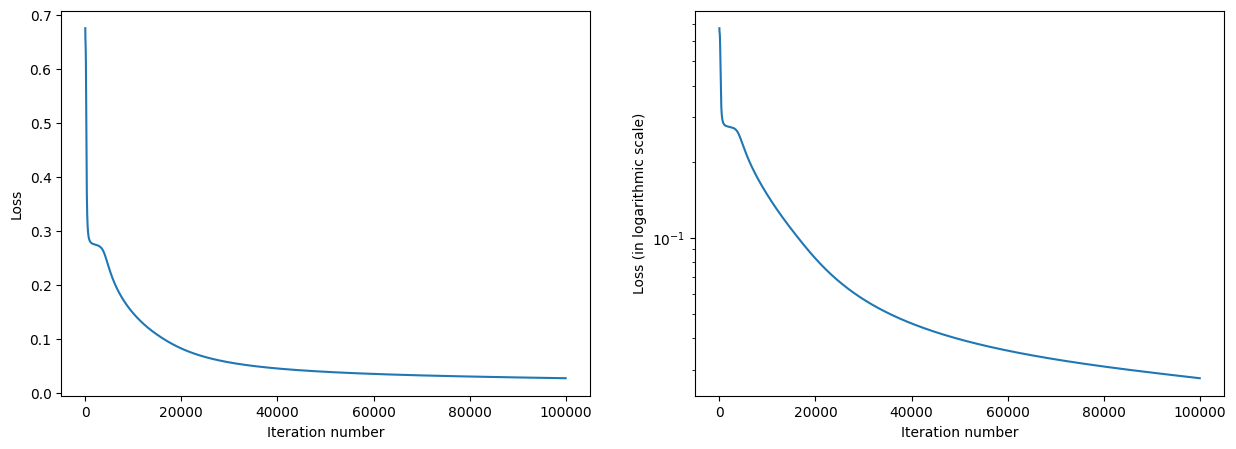

In [16]:
shallow_neural_net_adam.show_losses_over_training()

### Final visualizations and discussion

...

In [19]:
def find_v2(v1, model, min_val, max_val, thr = 1e-3):
    # Dichotomic search, to be used for boundary drawing later
    v2_min = min_val
    v2_max = max_val
    while((v2_max - v2_min) > thr):
        v2_avg = (v2_max + v2_min)/2
        out = model.forward([v1, v2_avg])
        if(out > 0.5):
            v2_max = v2_avg
        else:
            v2_min = v2_avg
    return (v2_max + v2_min)/2

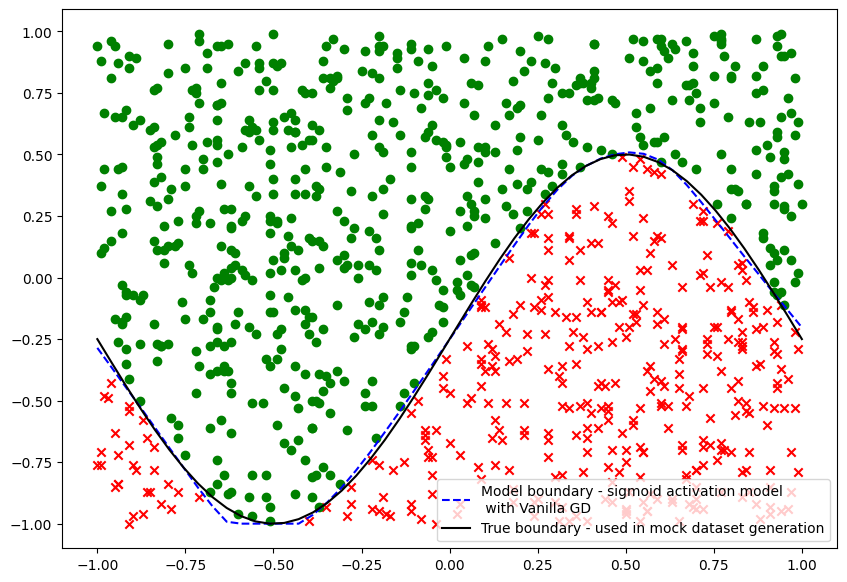

In [20]:
# Initialize plot
fig = plt.figure(figsize = (10, 7))

# Scatter plot
markers = {0: "x", 1: "o"}
colors = {0: "r", 1: "g"}
indexes_0 = np.where(outputs == 0)[0]
v1_0 = val1_list[indexes_0]
v2_0 = val2_list[indexes_0]
indexes_1 = np.where(outputs == 1)[0]
v1_1 = val1_list[indexes_1]
v2_1 = val2_list[indexes_1]
plt.scatter(v1_0, v2_0, c = colors[0], marker = markers[0])
plt.scatter(v1_1, v2_1, c = colors[1], marker = markers[1])

# Display model boundary (sigmoid model, vanilla GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_vanilla = [find_v2(v1, shallow_neural_net_vanilla, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_vanilla, "b--", label = "Model boundary - sigmoid activation model \n with Vanilla GD")

# Display model boundary (sigmoid model, Adagrad GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adagrad = [find_v2(v1, shallow_neural_net_adagrad, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adagrad, "r--", label = "Model boundary - sigmoid activation model \n with Adam")

# Display model boundary (sigmoid model, RMSProp GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_rmsprop = [find_v2(v1, shallow_neural_net_rmsprop, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_rmsprop, "g--", label = "Model boundary - sigmoid activation model \n with Adam")

# Display model boundary (sigmoid model, Adam GD)
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_model_adam = [find_v2(v1, shallow_neural_net_adam, min_val, max_val, thr = 1e-3) for v1 in x1]
plt.plot(x1, x2_model_adam, "m--", label = "Model boundary - sigmoid activation model \n with Adam")

# Display true boundary
x1 = [v1 for v1 in np.linspace(min_val, max_val, 50)]
x2_true = [-1/4 + 3/4*np.sin(v1*np.pi) for v1 in x1]
plt.plot(x1, x2_true, "k", label = "True boundary - used in mock dataset generation")

# Show
plt.legend(loc = "best")
plt.show()

### More advanced GD - Adding momentum

...

### What's next?

In the next notebook, we will investigate the impact of using activation functions in Neural Networks and implement them in our class.

This vanishing gradient problem is something we will explore again on Week 4, when discussing residuals and how they help address the vanishing gradient problem in CNNs.